# Univariate Linear Regression Programming Excercise

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

## Linear Regression with one variable

In [2]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
print(data.shape)

(97, 2)


In [3]:
x = np.c_[np.ones(data.shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]

Text(0.5, 1.0, 'Data set')

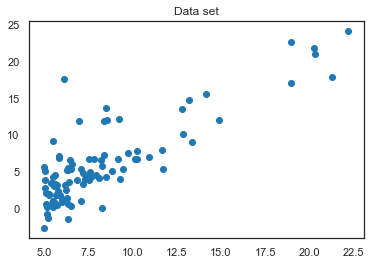

In [4]:
plt.scatter(x[:,1],y)
plt.title('Data set')

## Cost function
A cost function has to be used to track how are training phase is going and as a metric of goodness. The cost function has the following form:
$$J(\theta) = \dfrac{1}{2*m}\sum_{j=1}^{m}(h_\theta(x^{(j)})-y^{(j)})^2$$
where:
- $h_\theta(x^{(j)})$ represents the prediction that our model do
- $y^{(j)}$ is the true value. In the best case, we'd like our model to predict this value
- $m$ is the number of sample at our disposal in the training set

In [5]:
theta = [[0],[0]]

In [6]:
def calculate_cost(x, y, theta = [[0],[0]]):
    h = x.dot(theta)
    return 1/(2 * data.shape[0]) * np.sum(np.square(h - y))

Text(0.5, 1.0, 'Data set and starting fitting line')

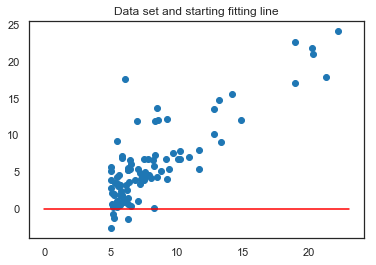

In [7]:
plt.scatter(x[:,1],y)
plt.plot(np.arange(0, 24) * theta[1] + theta[0], 'r')
plt.title('Data set and starting fitting line')

In the graph above it is possibile to see the line representing the parameters drawn with the red color. **Our model is not trained yet, so it doesn't follow the data**.

## Batch Gradient Descent
Let's use the *batch gradient descent*, wich uses the whole training set to predict the parameters that approximate the data in the best possible way. The problem with this approach is that it becomes slower as the dataset becomes bigger. For this reason, it is best to use this approach only with small training sets.

Since we're trying to reduce the cost function, we will consider the gradient of this function, which can be written in two version:
- Scalar version
- Vectorized version

### Gradient function
#### Scalar version
$$\dfrac{\partial J}{\partial \theta_i} = \dfrac{1}{m}(h_{\theta}x^{(i)}-y^{(i)})x^{(i)}$$
#### Vectorized version
$$\dfrac{\partial J}{\partial \theta}(\theta) = \dfrac{1}{m} x^T(x\theta - y)$$
### Gradient descent
The gradient just introduced has to be used in a method (an iterative one). We will implement an algorithm that uses the following formula:
$$\theta^{(k)} = \theta^{(k-1)} - \dfrac{\alpha}{m} \dfrac{\partial J}{\partial \theta_i}(\theta^{(k)})$$
At each itearation, the current estimatate of the parameters get updated using the last estimate and a term that depends on a learning rate $\alpha$ and the gradient value.

In [8]:
iterations_to_do = 1500
initial_cost = calculate_cost(x, y)
costs = [initial_cost]

In [9]:
def gradient_descent(x, y, alpha = .1, theta=[[0],[0]], iterations = 1500):
    for i in range(0, iterations):
        theta = theta - (alpha / data.shape[0]) * (x.T).dot(x.dot(theta) - y)
        costs.append(calculate_cost(x, y, theta))
    return theta

In [10]:
final_theta = gradient_descent(x, y, alpha = .01, theta=[[0],[0]], iterations = iterations_to_do)

print("The estimated parameters that fit our date are: \n{}".format(final_theta))

The estimated parameters that fit our date are: 
[[-3.63029144]
 [ 1.16636235]]


## Final results
### Fitted lines

Text(0, 0.5, 'Profit in $10.000')

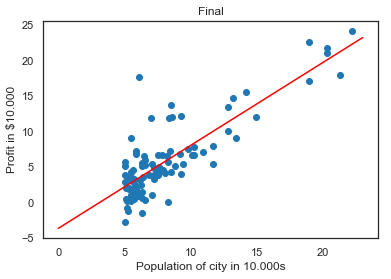

In [11]:
plt.scatter(x[:,1],y)
plt.plot(np.arange(0, 24) * final_theta[1] + final_theta[0], 'r')
plt.title('Final')
plt.xlabel('Population of city in 10.000s')
plt.ylabel('Profit in $10.000')

It is now possible to see the line that we can use to do predictions. It is the best (linear) line possible that approximate the sample in the training set used.
### Errors
We can see how the error is affected when the parameters change. Let's first see the differences between the first and the last iteration.
#### First iteration

In [12]:
print("The error at the first iteration is: {}".format(initial_cost))

The error at the first iteration is: 32.072733877455676


#### Last iteration

In [13]:
print("The error at the last iteration is: {}".format(calculate_cost(x, y, final_theta)))

The error at the last iteration is: 4.483388256587725


#### Overall cost on different iteration
Let's draw how the cost changes at each iteration 

Text(0.5, 1.0, 'Cost over iterations')

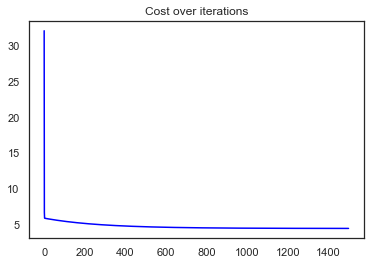

In [14]:
plt.plot(np.arange(0, iterations_to_do + 1, 1), costs, 'b')
plt.title('Cost over iterations')

### Prediction from learned parameters
We'll now use the parameters found to predict:
1. The profit for a population of 3.5k people
2. The profit for a population of 7k people

In [15]:
print("The profit for a population of 3.5k people is: {}".format(final_theta.T.dot([1, 3.5])*10000))
print("The profit for a population of 7k people is: {}".format(final_theta.T.dot([1, 7])*10000))

The profit for a population of 3.5k people is: [4519.7678677]
The profit for a population of 7k people is: [45342.45012945]


### Show if the optimization has gone right
In order to see if the optimization of the cost function worked, we can use the contour plot to see where the parameter are with respect to the variation of the parameters and, consequently, the cost function.

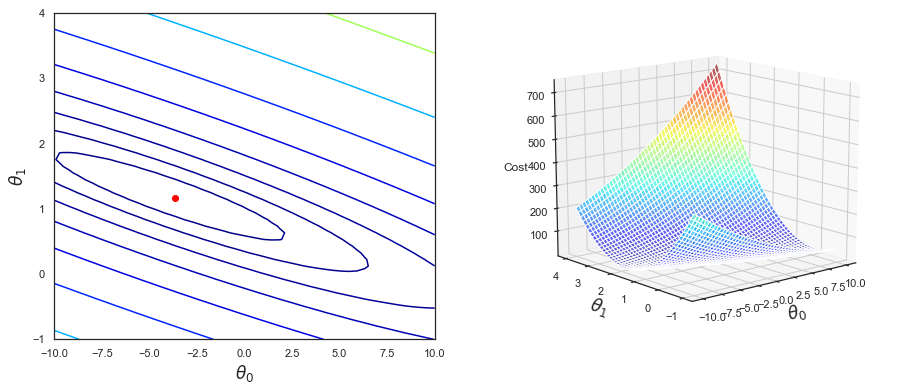

In [16]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = calculate_cost(x,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(final_theta[0],final_theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

In the left image the red dot represents the parameters found using the gradient descent algorithm. It is possible to see that it is near the center of the smaller ellipsis, which represent the zone where the cost function value is the smallest. 

In the right image, it is possible to see a 3D plot og the cost function.

# Multivariate Linear Regression
The dataset has the squared meters of the house and the number of bathrooms, while the third column represents the price of the houses.
The problem here is the different scale of the features. The problem can be solved by **feature scaling**.

## Load data

In [17]:
data = np.loadtxt('data/ex1data2.txt', delimiter=',')

print(data.shape)

(47, 3)


In [18]:
x = data[:, :2]
y = data[:, -1]

# from n-dimensional vector to m x 1 matrix
y = np.reshape(y, (y.shape[0], 1))

m = x.shape[0]
print("Training examples: {}".format(m))

n = x.shape[1]
print("Features: {}".format(n))

print("10 examples: \n", x[:10, :])

Training examples: 47
Features: 2
10 examples: 
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]]


## Features normalization
The **feature normalization** is necessary because the features have not the same order of magnitude. This is a bad thing as our classifiers will give more weight to the larger features instead of treating all of them equally. This phase will help removing this problem by reducing the differences in the order of magnitude while keeping the same informations on the feature being normalized.

From all the features, the normalization can be done in two steps:
1. Subtract the mean value
2. Didive by the standard deviation

In [19]:
def feature_normalize(x):
    x_norm = x
    
    mu = np.zeros((1, x.shape[1]))
    sigma = np.zeros((1, x.shape[1]))
    
    mu = np.mean(x, axis = 0) # mean value
    sigma = np.std(x, axis = 0) # std deviation value
    
    for i in range(x.shape[1]):
        x_norm[:,i] = (x[:,i] - mu[i])/sigma[i]
        
    return x_norm, mu, sigma

In [20]:
x_norm, mu, sigma = feature_normalize(x)
print("10 normalized examples: \n", x_norm[:10, :])
print("Mean value: {}".format(mu))
print("Standard deviation value: {}".format(sigma))

10 normalized examples: 
 [[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]
 [-0.01994505  1.10220517]
 [-0.59358852 -0.22609337]
 [-0.72968575 -0.22609337]
 [-0.78946678 -0.22609337]
 [-0.64446599 -0.22609337]]
Mean value: [2000.68085106    3.17021277]
Standard deviation value: [7.86202619e+02 7.52842809e-01]


## Add a column for dealing with all the parameters
As the hypothesis function is as follow:
$$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$
we need to add a new column of *1* to the dataset in order to deal with the $\theta_0$ parameter.

In [21]:
x_norm = np.concatenate([np.ones((m,1)), x_norm], axis = 1) # Add the column of ones to the data examples (for $\theta_0$) 

print(x_norm.shape)

(47, 3)


## Introduce functions to compute cost and gradient descent

In [22]:
def gradient_descent(x, y, theta, alpha = 0.1, iterations = 1500):
    costs = []
    for i in range(0, iterations):
        theta = theta - (alpha / x.shape[0]) * (x.T).dot(x.dot(theta) - y)
        costs.append(calculate_cost(x, y, theta))
    return theta, costs

def calculate_cost(x, y, theta = [[0],[0],[0]]):
    h = x.dot(theta)
    return 1/(2 * x.shape[0]) * np.sum(np.square(h - y))

## Running gradient descent

In [23]:
alpha = 0.1
num_iters = 400

theta = np.zeros((3, 1))
theta, cost_history = gradient_descent(x_norm, y, theta, alpha, num_iters)

theta_no_norm = np.zeros((3, 1))
x = np.concatenate([np.ones((m,1)), x], axis = 1)# Add column of ones to non normalized dataset
theta_no_norm, cost_history_no_norm = gradient_descent(x, y, theta_no_norm, alpha, num_iters)

print("Non normalized theta:\n {}\n\n".format(theta_no_norm))
print("Normalized theta:\n {}\n\n".format(theta))

Non normalized theta:
 [[340412.65957447]
 [109447.79558639]
 [ -6578.3539709 ]]


Normalized theta:
 [[340412.65957447]
 [109447.79558639]
 [ -6578.3539709 ]]




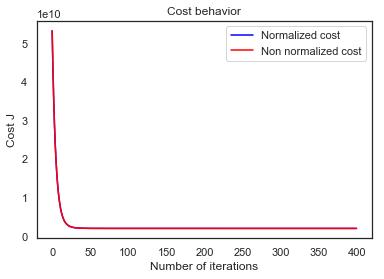

In [24]:
# Plot the convergence graph
plt.plot([i for i in range(num_iters)], cost_history, '-b', label = 'Normalized cost')
plt.plot([i for i in range(num_iters)], cost_history_no_norm, '-r', label = 'Non normalized cost')
plt.xlabel('Number of iterations') # Set the x−axis label
plt.ylabel('Cost J') # Set the y−axis label 
plt.title('Cost behavior')
plt.legend()
plt.show()

In [25]:
# Display gradient descent's results
print('Theta computed from gradient descent: \n{}'.format(theta))

Theta computed from gradient descent: 
[[340412.65957447]
 [109447.79558639]
 [ -6578.3539709 ]]


## Let's use the normal equations
We can take the same results in only one calculation and without any feature scaling. This is a closed form solution, but it can be used for smaller dataset. For big dataset, it is mandatory to use the **Batch Gradient Descent** or **Stochastic Gradient Descent**.   
$ \theta = (X^{T}X)^{-1}X^Ty $

In [26]:
def normal_equations(x, y):
    return np.linalg.pinv(x.T.dot(x)).dot(x.T).dot(y)

In [27]:
normal_theta = normal_equations(x, y);
print(normal_theta)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


## Let's predict something
Estimate the price for a 1650 squared meters and 3 bedrooms 

In [28]:
for_prediction = np.array([1650, 3])
for_prediction = np.array([1, (for_prediction[0] - mu[0])/sigma[0], (for_prediction[1] - mu[1])/sigma[1]]) # This is the new normalized feature set to be used for the scaling
for_prediction = for_prediction.reshape((for_prediction.shape[0], 1))

# Let's predict the cost using the hypothesis values
predicted_cost = theta.T.dot(for_prediction)
print('Predicted cost for a 1650 squared meters and 3 bedrooms house: {}'.format(predicted_cost))

Predicted cost for a 1650 squared meters and 3 bedrooms house: [[293081.46452917]]


## Slowing down the training phase
During the training phase, we use the gradient descent algorithm, which depends on a parameter: the **learning rate**.

The possible scenarios are:
1. If a very *little* value for the learning rate is used, the time needed to the training phase will be longer;
2. If we use a *big* value for the learning rate, we can end up overshooting the global (or local) minimum. Eventually we can end up diverging.

There is no known way to set the learning rate to an optimal value, but it is necessary to try different values and keep the one which works better.

Let's see the differences when using different type of learning rates:

In [29]:
alpha = 0.0001
num_iters = 10000

theta_little = np.zeros((3, 1))
theta_little, cost_history_little = gradient_descent(x_norm, y, theta_little, alpha, num_iters)

print("Theta using a learning rate of 1e-7: \n{}\n\n".format(theta_little))

Theta using a learning rate of 1e-7: 
[[215188.10240439]
 [ 61279.52044616]
 [ 19975.26231463]]




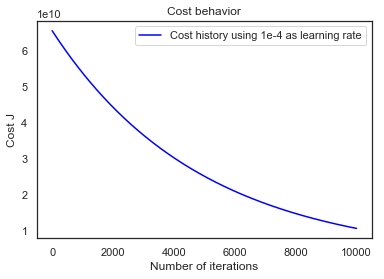

In [30]:
# Plot the convergence graph
plt.plot([i for i in range(num_iters)], cost_history_little, '-b', label = 'Cost history using 1e-4 as learning rate')
plt.xlabel('Number of iterations') # Set the x−axis label
plt.ylabel('Cost J') # Set the y−axis label 
plt.title('Cost behavior')
plt.legend()
plt.show()

Using a small learning rate ($\alpha = 0.0001$) slows down the learning phase as it can be seen in the graph.

Using such a small learning rate prevents our algorithm from converging to the optimal minimum in 10000 iterations, even if it can be reached in less than 50 iterations as before (using $\alpha=0.1$). 

In [31]:
alpha = 2
num_iters = 10
theta_big = np.zeros((3, 1))
theta_big, cost_history_big = gradient_descent(x_norm, y, theta_big, alpha, num_iters)

print("Theta using a learning rate of 1: \n{}\n\n".format(theta_big))

Theta using a learning rate of 1: 
[[-4.38885763e-08]
 [-9.41838069e+07]
 [-9.42998330e+07]]




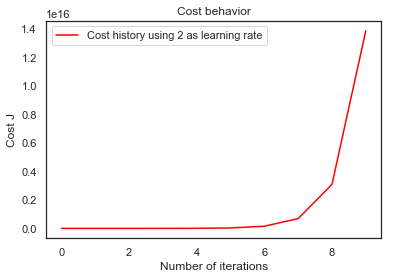

In [32]:
# Plot the convergence graph
plt.plot([i for i in range(num_iters)], cost_history_big, '-r', label = 'Cost history using 2 as learning rate')
plt.xlabel('Number of iterations') # Set the x−axis label
plt.ylabel('Cost J') # Set the y−axis label
plt.title('Cost behavior')
plt.legend()
plt.show()

The opposite event occurs when we choose the learning rate to be very big (in this case it is $2$). In this case the algorithm will not only overshoot the minimum, but it will diverge completely. This can be seen in the graph, because **the cost increases as the number of iterations increase**. 

An other thing that can modify the algorithm's convergence is the choice of the starting point given to the *gradient descent* algorithm. This happens for the nature of the algorithm, as it look for the descending direction of the gradient and goes into that direction. 

Let's try to use this in our case:

In [33]:
alpha = .01
num_iters = 1000
theta = np.array([1, 2, 3]).reshape((3,1))
theta, cost_history = gradient_descent(x_norm, y, theta, alpha, num_iters)

print("Theta using a learning rate of 1: \n{}\n\n".format(theta_big))

Theta using a learning rate of 1: 
[[-4.38885763e-08]
 [-9.41838069e+07]
 [-9.42998330e+07]]




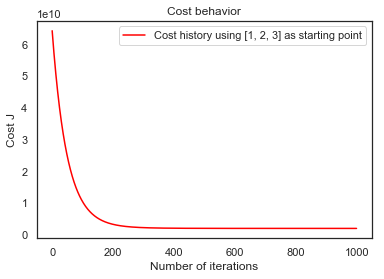

In [34]:
# Plot the convergence graph
plt.plot([i for i in range(num_iters)], cost_history, '-r', label = 'Cost history using [1, 2, 3] as starting point')
plt.xlabel('Number of iterations') # Set the x−axis label
plt.ylabel('Cost J') # Set the y−axis label
plt.title('Cost behavior')
plt.legend()
plt.show()

In this case the convergence isn't affected from the choice of the starting point as our function to be optimized is defined **bowl shaped**, which means that it has only a local minimun and it is the global one.

Different things could happen when the function to be optimized has different local and global minima, because it can happen that if we choose a starting point near a local minimum, then it will be the one reached: the global minimum won't be reached.

To mitigate this problem, it is usually usefull to run the *gradient descent* algorithm using different choices of the starting point. After all these runs, **the parameter with the smallest error attached will be chosen as the optimal one**.